# IMPORT DATA

In [3]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# read data
data = pd.read_csv('AdSmartABdata - AdSmartABdata.csv')
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


# SAMPLE SIZE

In [5]:
import scipy
import scipy.stats as stats

delta = 0.01        # absolute increase
alpha = 0.05       # significance level
power = 0.8        # power
std_dev = 0.04      # variance of population (assumed)

# calculate beta
beta = 1 - power
print(f"beta : {beta}")

# calculate the z-alpha and z-beta
z_alpha = stats.norm.ppf(1 - alpha/2)
z_beta = stats.norm.ppf(1 - beta)

print(f"z-alpha : {z_alpha}")
print(f"z-beta : {z_beta}")

# then calculate the number of sample size
n = 2 * (std_dev**2) * ((z_alpha+z_beta)**2) / (delta**2)
sample_2_group = n*2

print(f"Number of sample size needed: {n:.0f}")
print(f"Number of sample size needed for two groups: {sample_2_group:.0f}")

beta : 0.19999999999999996
z-alpha : 1.959963984540054
z-beta : 0.8416212335729143
Number of sample size needed: 251
Number of sample size needed for two groups: 502


Experiment duration

In [6]:
# find maksimum dan minimum days
max_date = data['date'].max()
min_date = data['date'].min()

print(f"Maksimum tanggal: {max_date}")
print(f"Minimum tanggal: {min_date}")

Maksimum tanggal: 2020-07-10
Minimum tanggal: 2020-07-03


Filter the data

In [7]:
# check non response (Yes = 0 and No = 0)
no_respons = data[(data['yes'] == 0) & (data['no'] == 0)]
no_respons

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [8]:
# drop the non-response data
new_data = data.drop(no_respons.index)
new_data

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1
...,...,...,...,...,...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1


# SAMPLING RANDOM DATA

In [9]:
# mengambil sample control
sample_control = new_data[new_data["experiment"] == "control"]
sample_control = sample_control.sample(n = 251, random_state =1) 
sample_control

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
7166,e3d9dd45-d1b7-4502-ab4a-d7f9f3a1c272,control,2020-07-08,19,Samsung SM-G960F,6,Chrome Mobile WebView,0,1
3374,6d0b7da0-7798-4b70-88c2-f94e5ab65cb6,control,2020-07-10,4,Generic Smartphone,6,Chrome Mobile,0,1
362,0b0344c4-b114-4705-ad68-6662f0d3bedc,control,2020-07-03,15,LG-$2,6,Chrome Mobile,1,0
6413,cb7d4819-501d-471c-ad2b-f4f945eb411e,control,2020-07-09,19,Samsung SM-G960F,6,Samsung Internet,1,0
3574,735d2323-b1f5-4fb8-9893-96a00e3a4e0f,control,2020-07-05,4,Samsung SM-G975F,6,Chrome Mobile WebView,1,0
...,...,...,...,...,...,...,...,...,...
7808,f79d0a9c-3d11-4145-aa4d-74bfb4dbc399,control,2020-07-06,3,Samsung SM-A105FN,6,Samsung Internet,1,0
5869,b9bb4710-4bde-43a7-ac9b-951f7a8d6e95,control,2020-07-07,13,Generic Smartphone,6,Chrome Mobile,1,0
4112,841b275a-7749-4182-bf5e-ef2720adee08,control,2020-07-03,15,Samsung SM-A515F,6,Chrome Mobile WebView,0,1
7670,f2ba9aee-4c90-41c1-85b8-340611a851c9,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0


In [10]:
# mengambil sample treatment
sample_treatment = new_data[new_data["experiment"] == "exposed"]
sample_treatment = sample_treatment.sample(n = 251, random_state = 1)
sample_treatment

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
6025,bf518047-40e7-44e0-a653-16fb004dacab,exposed,2020-07-09,9,Generic Smartphone,6,Chrome Mobile,0,1
7470,ec77e672-dc3d-47ed-9fbb-f9f2a2d71ab7,exposed,2020-07-05,9,Generic Smartphone,6,Chrome Mobile,0,1
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0
4071,82a14bc9-b578-4f25-9bef-137c3136a094,exposed,2020-07-03,9,Generic Smartphone,6,Chrome Mobile,0,1
3119,64f4838d-5f0d-49a1-be79-f261ec4d8ddd,exposed,2020-07-04,17,Generic Smartphone,6,Chrome Mobile,0,1
...,...,...,...,...,...,...,...,...,...
7610,f0e7fb7e-636a-492a-9666-0a6db8b2fa03,exposed,2020-07-09,9,Generic Smartphone,6,Chrome Mobile,1,0
6671,d3bad2f2-1619-413b-96c9-460ca19c4ab3,exposed,2020-07-09,0,Samsung SM-A310F,6,Samsung Internet,1,0
2183,4796d66c-1849-4a31-bb38-75b0d41d566c,exposed,2020-07-06,9,Generic Smartphone,6,Chrome Mobile,0,1
5245,a67c0609-3e55-4aec-9078-e9bd2c528ce8,exposed,2020-07-07,11,Generic Smartphone,6,Chrome Mobile,0,1


In [11]:
sample_data = pd.concat([sample_control, sample_treatment], ignore_index=True)
sample_data

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,e3d9dd45-d1b7-4502-ab4a-d7f9f3a1c272,control,2020-07-08,19,Samsung SM-G960F,6,Chrome Mobile WebView,0,1
1,6d0b7da0-7798-4b70-88c2-f94e5ab65cb6,control,2020-07-10,4,Generic Smartphone,6,Chrome Mobile,0,1
2,0b0344c4-b114-4705-ad68-6662f0d3bedc,control,2020-07-03,15,LG-$2,6,Chrome Mobile,1,0
3,cb7d4819-501d-471c-ad2b-f4f945eb411e,control,2020-07-09,19,Samsung SM-G960F,6,Samsung Internet,1,0
4,735d2323-b1f5-4fb8-9893-96a00e3a4e0f,control,2020-07-05,4,Samsung SM-G975F,6,Chrome Mobile WebView,1,0
...,...,...,...,...,...,...,...,...,...
497,f0e7fb7e-636a-492a-9666-0a6db8b2fa03,exposed,2020-07-09,9,Generic Smartphone,6,Chrome Mobile,1,0
498,d3bad2f2-1619-413b-96c9-460ca19c4ab3,exposed,2020-07-09,0,Samsung SM-A310F,6,Samsung Internet,1,0
499,4796d66c-1849-4a31-bb38-75b0d41d566c,exposed,2020-07-06,9,Generic Smartphone,6,Chrome Mobile,0,1
500,a67c0609-3e55-4aec-9078-e9bd2c528ce8,exposed,2020-07-07,11,Generic Smartphone,6,Chrome Mobile,0,1


# ENSURE TRUTHWORTHINSESS

1. Check missing values

In [12]:
# check missing value
sample_data.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

2. Uniqueness

In [13]:
# check duplicate
sample_data.duplicated('auction_id').sum()

0

3. Invalid Values

In [14]:
unique_exp = sample_data['experiment'].unique()
print(f"unique experiment : {unique_exp}")

unique_date = sample_data['date'].unique()
print(f"unique date : {unique_date}")

unique_hour = sample_data['hour'].unique()
print(f"unique hour : {unique_hour}")

unique_os = sample_data['platform_os'].unique()
print(f"unique os : {unique_os}")

unique_browser = sample_data['browser'].unique()
print(f"unique browser : {unique_browser}")

unique experiment : ['control' 'exposed']
unique date : ['2020-07-08' '2020-07-10' '2020-07-03' '2020-07-09' '2020-07-05'
 '2020-07-07' '2020-07-04' '2020-07-06']
unique hour : [19  4 15 16 10  0  5 14  6 13  3 20  2  7  9  1 11 21 22 18  8 17 12 23]
unique os : [6 5]
unique browser : ['Chrome Mobile WebView' 'Chrome Mobile' 'Samsung Internet' 'Facebook'
 'Mobile Safari' 'Chrome Mobile iOS' 'Chrome']


4. Data Delays

In [15]:
data['date'] = pd.to_datetime(sample_data['date'])
datasorted = sample_data.sort_values(by='date', ascending=True)

In [16]:
# data delay
data.loc[data['date'] > '10-07-2020']

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no


In [17]:
# data overview
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   502 non-null    object
 1   experiment   502 non-null    object
 2   date         502 non-null    object
 3   hour         502 non-null    int64 
 4   device_make  502 non-null    object
 5   platform_os  502 non-null    int64 
 6   browser      502 non-null    object
 7   yes          502 non-null    int64 
 8   no           502 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 35.4+ KB


In [18]:
sample_data['experiment'].value_counts()

experiment
control    251
exposed    251
Name: count, dtype: int64

In [19]:
# change 'Yes' to convert
sample_data.drop('no', axis = 1, inplace = True)
sample_data.rename(columns = {'yes':'converted'}, inplace = True)
sample_data

,auction_id,experiment,date,hour,device_make,platform_os,browser,converted
0,e3d9dd45-d1b7-4502-ab4a-d7f9f3a1c272,control,2020-07-08,19,Samsung SM-G960F,6,Chrome Mobile WebView,0
1,6d0b7da0-7798-4b70-88c2-f94e5ab65cb6,control,2020-07-10,4,Generic Smartphone,6,Chrome Mobile,0
2,0b0344c4-b114-4705-ad68-6662f0d3bedc,control,2020-07-03,15,LG-$2,6,Chrome Mobile,1
3,cb7d4819-501d-471c-ad2b-f4f945eb411e,control,2020-07-09,19,Samsung SM-G960F,6,Samsung Internet,1
4,735d2323-b1f5-4fb8-9893-96a00e3a4e0f,control,2020-07-05,4,Samsung SM-G975F,6,Chrome Mobile WebView,1
...,...,...,...,...,...,...,...,...
497,f0e7fb7e-636a-492a-9666-0a6db8b2fa03,exposed,2020-07-09,9,Generic Smartphone,6,Chrome Mobile,1
498,d3bad2f2-1619-413b-96c9-460ca19c4ab3,exposed,2020-07-09,0,Samsung SM-A310F,6,Samsung Internet,1
499,4796d66c-1849-4a31-bb38-75b0d41d566c,exposed,2020-07-06,9,Generic Smartphone,6,Chrome Mobile,0
500,a67c0609-3e55-4aec-9078-e9bd2c528ce8,exposed,2020-07-07,11,Generic Smartphone,6,Chrome Mobile,0


# CHECK SRM

In [20]:
import scipy
import scipy.stats as stats

# define data control and data treatment
data_control = sample_data[sample_data['experiment'] == 'control']
data_treatment = sample_data[sample_data['experiment'] == 'exposed']

# find n_ data every varian
n_control = data_control.shape[0]
n_treatment = data_treatment.shape[0]
print(f"Number of data control : {n_control}")
print(f"Number of data treatment : {n_treatment}")

# percentage in each group
n_total = sample_data.shape[0]
persen_control = n_control/n_total * 100
persen_treat = n_treatment/n_total * 100

print(f"% control   : {persen_control:.2f}%")
print(f"% treatment : {persen_treat:.2f}%")

Number of data control : 251
Number of data treatment : 251
% control   : 50.00%
% treatment : 50.00%


In [21]:
from scipy.stats import chisquare
import scipy

# expected n
observed = [n_control, n_treatment]
total_traffic= sum(observed)
expected = [total_traffic/2, total_traffic/2]

# calculate chi-square statistics to detect SRM
chi = chisquare(observed, f_exp=expected)
print(chi)

# critical value chi-square
alpha = 0.01
df=(2-1)*(2-1)  

chi_critical = scipy.stats.chi2.ppf(1 - alpha, df)
print(f"Critical value chi-square: {chi_critical:.3f}")


Power_divergenceResult(statistic=0.0, pvalue=1.0)
Critical value chi-square: 6.635


In [22]:
# decisions from chi-square statistics and critical value
if chi[0] > chi_critical:
  print("Reject H0 : SRM may be present.")
else:
  print("Fail to reject H0 : No SRM")

Fail to reject H0 : No SRM


In [23]:
# decision by P-Value
if chi[1] < 0.01:
    print('Reject H0 : SRM may be present.')
else:
    print('Fail to reject H0 : No SRM.')

Fail to reject H0 : No SRM.


# STATISTIK DESKRIPTIF

In [24]:
sample_data

,auction_id,experiment,date,hour,device_make,platform_os,browser,converted
0,e3d9dd45-d1b7-4502-ab4a-d7f9f3a1c272,control,2020-07-08,19,Samsung SM-G960F,6,Chrome Mobile WebView,0
1,6d0b7da0-7798-4b70-88c2-f94e5ab65cb6,control,2020-07-10,4,Generic Smartphone,6,Chrome Mobile,0
2,0b0344c4-b114-4705-ad68-6662f0d3bedc,control,2020-07-03,15,LG-$2,6,Chrome Mobile,1
3,cb7d4819-501d-471c-ad2b-f4f945eb411e,control,2020-07-09,19,Samsung SM-G960F,6,Samsung Internet,1
4,735d2323-b1f5-4fb8-9893-96a00e3a4e0f,control,2020-07-05,4,Samsung SM-G975F,6,Chrome Mobile WebView,1
...,...,...,...,...,...,...,...,...
497,f0e7fb7e-636a-492a-9666-0a6db8b2fa03,exposed,2020-07-09,9,Generic Smartphone,6,Chrome Mobile,1
498,d3bad2f2-1619-413b-96c9-460ca19c4ab3,exposed,2020-07-09,0,Samsung SM-A310F,6,Samsung Internet,1
499,4796d66c-1849-4a31-bb38-75b0d41d566c,exposed,2020-07-06,9,Generic Smartphone,6,Chrome Mobile,0
500,a67c0609-3e55-4aec-9078-e9bd2c528ce8,exposed,2020-07-07,11,Generic Smartphone,6,Chrome Mobile,0


In [25]:
# make data control
data_control = sample_data[sample_data['experiment'] == 'control']
data_control.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,converted
0,e3d9dd45-d1b7-4502-ab4a-d7f9f3a1c272,control,2020-07-08,19,Samsung SM-G960F,6,Chrome Mobile WebView,0
1,6d0b7da0-7798-4b70-88c2-f94e5ab65cb6,control,2020-07-10,4,Generic Smartphone,6,Chrome Mobile,0
2,0b0344c4-b114-4705-ad68-6662f0d3bedc,control,2020-07-03,15,LG-$2,6,Chrome Mobile,1
3,cb7d4819-501d-471c-ad2b-f4f945eb411e,control,2020-07-09,19,Samsung SM-G960F,6,Samsung Internet,1
4,735d2323-b1f5-4fb8-9893-96a00e3a4e0f,control,2020-07-05,4,Samsung SM-G975F,6,Chrome Mobile WebView,1


In [26]:
# make data treatment
data_treatment = sample_data[sample_data['experiment'] == 'exposed']
data_treatment.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,converted
251,bf518047-40e7-44e0-a653-16fb004dacab,exposed,2020-07-09,9,Generic Smartphone,6,Chrome Mobile,0
252,ec77e672-dc3d-47ed-9fbb-f9f2a2d71ab7,exposed,2020-07-05,9,Generic Smartphone,6,Chrome Mobile,0
253,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1
254,82a14bc9-b578-4f25-9bef-137c3136a094,exposed,2020-07-03,9,Generic Smartphone,6,Chrome Mobile,0
255,64f4838d-5f0d-49a1-be79-f261ec4d8ddd,exposed,2020-07-04,17,Generic Smartphone,6,Chrome Mobile,0


In [27]:
# check converted user
data_control_convert = data_control[data_control['converted'] == 1]
n_control_convert = data_control_convert.shape[0]

data_treatment_convert = data_treatment[data_treatment['converted'] == 1]
n_treatment_convert = data_treatment_convert.shape[0]

print(f"Number of data control convert : {n_control_convert}")
print(f"Number of data treatment convert : {n_treatment_convert}")

Number of data control convert : 124
Number of data treatment convert : 112


In [28]:
# calculate conversion rate for each group
cr_control = (n_control_convert/n_control)
cr_treatment = (n_treatment_convert/n_treatment)

print(f"Conversion rate for group control: {cr_control:.2f}")
print(f"Conversion rate for group treatment: {cr_treatment:.2f}")

Conversion rate for group control: 0.49
Conversion rate for group treatment: 0.45


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10764\2408984827.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=["control", "treatment"], fontsize=16)


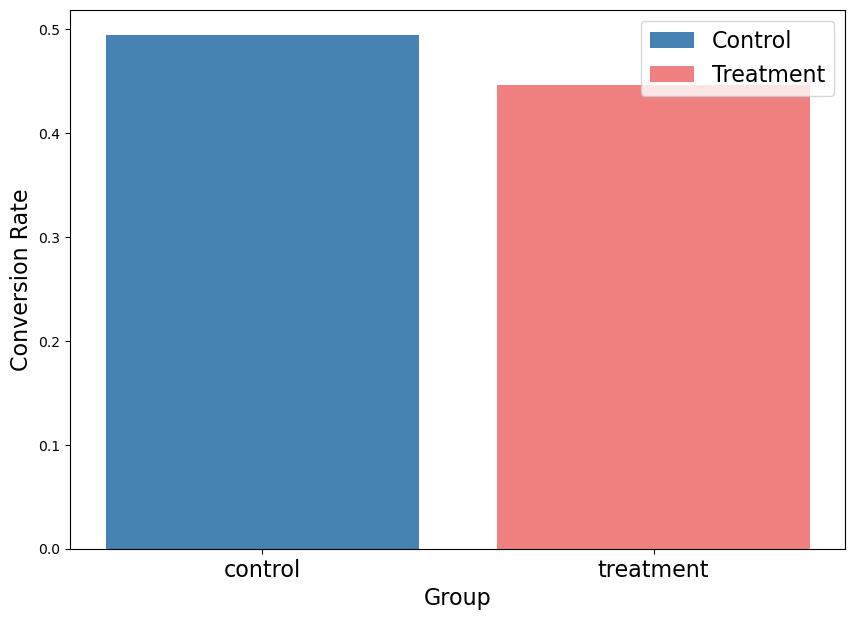

In [29]:
# visualisasi perbandingan conversion rate tiap varian
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Buat plot
ax.bar("control", cr_control, color="steelblue", label="Control")
ax.bar("treatment", cr_treatment, color="lightcoral", label="Treatment")

# Styling plot
ax.set_ylabel("Conversion Rate", fontsize=16)
ax.set_xlabel("Group", fontsize=16)
ax.set_xticklabels(labels=["control", "treatment"], fontsize=16)
ax.legend(fontsize=16)
plt.show()

# STATISTICAL TEST

In [41]:
from statsmodels.stats.proportion import proportions_ztest

In [43]:
# define count convert and total observation
count_convert = [n_treatment_convert, n_control_convert]
count_observation = [n_treatment, n_control]

# calculate z-statistic and p-value
z_stat, p_value = proportions_ztest(count = count_convert,
                                    nobs = count_observation,
                                    alternative = 'larger')
print(f"Z stats : {z_stat:}")
print(f"P-value : {p_value:}")

# calculate z-critical
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha)
print(f"Z critical : {z_critical:}")

Z stats : -1.0730903386873218
P-value : 0.8583847073204088
Z critical : 1.6448536269514722


In [32]:
# make decision based on p-value
if p_value < alpha:
    print("Decision : Reject Null Hypothesis")
else:
    print("Decision : Failed to Reject Null Hypothesis")

Decision : Failed to Reject Null Hypothesis


In [33]:
# make decision based on z-test
if z_stat > z_critical:
    print("Decision : Reject Null Hypothesis")
else:
    print("Decision : Failed to Reject Null Hypothesis")

Decision : Failed to Reject Null Hypothesis


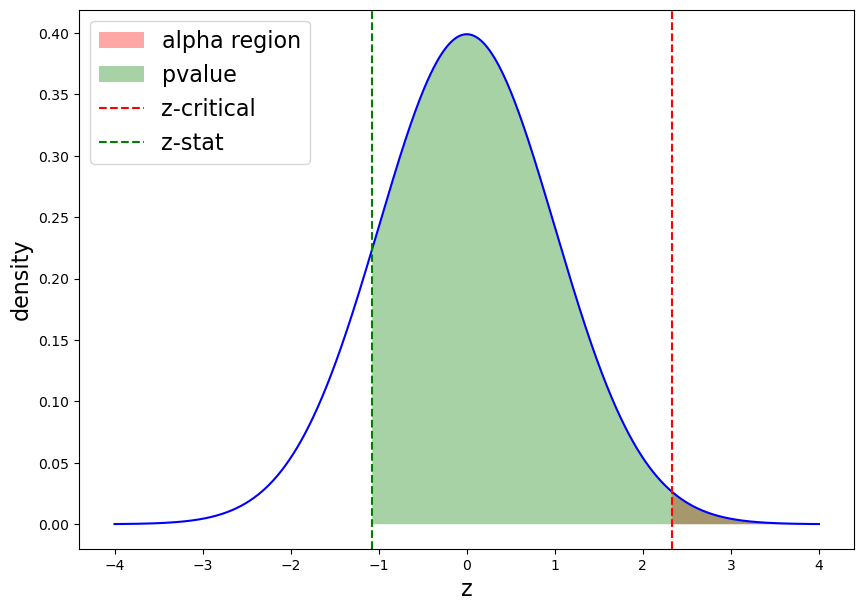

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Plot distribusi sample
x_sample = np.arange(-4., 4., 0.001)
y_sample = stats.norm.pdf(x_sample, 0, 1)
ax.plot(x_sample, y_sample,
        color = "blue")

# Plot region dari alpha (region tempat menolak H-0)
x_alpha = np.arange(z_critical, 4., 0.001)
y_alpha = stats.norm.pdf(x_alpha)
ax.fill_between(x = x_alpha,
                y1 = y_alpha,
                facecolor = "red", 
                alpha = .35,
                label = "alpha region")


# Plot region dari sampel yang kita temukan
x_test = np.arange(z_stat, 4., 0.001)
y_test = stats.norm.pdf(x_test)
ax.fill_between(x = x_test,
                y1 = y_test,
                facecolor = "green", 
                alpha = .35,
                label = "pvalue")


# Plot vertical line alpha
ax.axvline(z_critical, 
           color = "red",
           linestyle = "--",
           label = "z-critical")

# Plot vertical line test
ax.axvline(z_stat, 
           color = "green",
           linestyle = "--",
           label = "z-stat")


# Styling plot
ax.set_xlabel("z", fontsize=16)
ax.set_ylabel("density", fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [44]:
import statsmodels.stats.proportion as smp

# Calculate the confidence interval
confidence_interval = smp.confint_proportions_2indep(count1=n_treatment_convert, nobs1=n_treatment,
                                                     count2=n_control_convert, nobs2=n_control, 
                                                     compare='diff', alpha=0.05)

print(confidence_interval)


(-0.13386823518539348, 0.039266242474423535)


In [36]:
sample_data

,auction_id,experiment,date,hour,device_make,platform_os,browser,converted
0,e3d9dd45-d1b7-4502-ab4a-d7f9f3a1c272,control,2020-07-08,19,Samsung SM-G960F,6,Chrome Mobile WebView,0
1,6d0b7da0-7798-4b70-88c2-f94e5ab65cb6,control,2020-07-10,4,Generic Smartphone,6,Chrome Mobile,0
2,0b0344c4-b114-4705-ad68-6662f0d3bedc,control,2020-07-03,15,LG-$2,6,Chrome Mobile,1
3,cb7d4819-501d-471c-ad2b-f4f945eb411e,control,2020-07-09,19,Samsung SM-G960F,6,Samsung Internet,1
4,735d2323-b1f5-4fb8-9893-96a00e3a4e0f,control,2020-07-05,4,Samsung SM-G975F,6,Chrome Mobile WebView,1
...,...,...,...,...,...,...,...,...
497,f0e7fb7e-636a-492a-9666-0a6db8b2fa03,exposed,2020-07-09,9,Generic Smartphone,6,Chrome Mobile,1
498,d3bad2f2-1619-413b-96c9-460ca19c4ab3,exposed,2020-07-09,0,Samsung SM-A310F,6,Samsung Internet,1
499,4796d66c-1849-4a31-bb38-75b0d41d566c,exposed,2020-07-06,9,Generic Smartphone,6,Chrome Mobile,0
500,a67c0609-3e55-4aec-9078-e9bd2c528ce8,exposed,2020-07-07,11,Generic Smartphone,6,Chrome Mobile,0


In [37]:
# Calculate overall conversion rate
overall_conversion_rate = sample_data['converted'].mean()
overall_conversion_rate

0.4701195219123506

In [38]:
# Calculate conversion rates by browser
browser_data = sample_data['browser']
browser_convert = sample_data[sample_data['converted'] == 1]

In [39]:
# Calculate conversion rates by browser
browser_conversion = sample_data.groupby('browser')['converted'].agg(['sum', 'count'])
browser_conversion['cr'] = browser_conversion['sum'] / browser_conversion['count']
browser_conversion

,sum,count,cr
browser,,,
Chrome,1,2,0.500000
Chrome Mobile,120,260,0.461538
Chrome Mobile WebView,48,100,0.480000
Chrome Mobile iOS,1,1,1.000000
Facebook,29,65,0.446154
Mobile Safari,0,6,0.000000
Samsung Internet,37,68,0.544118


In [40]:
# Combine overall and browser conversion rates into one DataFrame
overall_df = pd.DataFrame({
    'category': ['overall'],
    'cr': [overall_conversion_rate]
})

browser_conversion.reset_index(inplace=True)
browser_conversion['category'] = browser_conversion['browser']
browser_conversion = browser_conversion[['category', 'cr']]

# Concatenate all results into a single DataFrame
result_df = pd.concat([overall_df, browser_conversion], ignore_index=True)

print(result_df)

                category        cr
0                overall  0.470120
1                 Chrome  0.500000
2          Chrome Mobile  0.461538
3  Chrome Mobile WebView  0.480000
4      Chrome Mobile iOS  1.000000
5               Facebook  0.446154
6          Mobile Safari  0.000000
7       Samsung Internet  0.544118
